# Spam email filtering
- In this project we will classify whether an email is spam or not.
- This project is my assignment for the **Internship** at **Eziline Software**.

## About Dataset
- The Dataset consist 5172 randomly collected emails with 3001 common words for each email and one label colunm that tells spam or not.

## About Task
- The task is to find out which emails are spam and which emails are not.
- The task falls under the umberalla of **supervised** machine learning since we have the labels for our emails.

# Importing libraries and loading dataset

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Lets get data
Dataset = pd.read_csv("/kaggle/input/email-spam-classification-dataset-csv/emails.csv")

# Understanding the Data

In [3]:
# Lets see the dataset
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [4]:
#Dataset.head()
Dataset.tail(10)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5162,Email 5163,2,3,1,2,1,2,32,0,0,...,0,0,0,0,0,0,0,0,0,1
5163,Email 5164,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5164,Email 5165,21,18,3,1,6,4,106,1,2,...,0,0,0,0,0,0,0,0,0,0
5165,Email 5166,1,0,1,0,3,1,12,1,0,...,0,0,0,1,0,0,0,0,0,0
5166,Email 5167,1,0,1,1,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


(array([3672.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1500.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

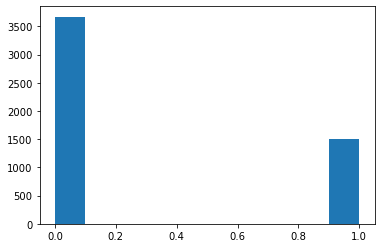

In [5]:
# Number of spam and ham emails
plt.hist(Dataset.Prediction)

# About Dataset
After initial analysis, let's Talk about data:
1. Our dataset has 5172 sample emails. Amoung these 5172 emails 1500 emails are Spam
2. The dataset is **moderatly** imbalanced since we have only 30% of data as positive cases.
3. Our dataset has 3001 features
4. There are also stopwords given as features and these colunms with stopwords need to be droped. (**Feature selection**)

# Data Cleaning (EDA Step 1)
1. Handling Duplicate values
2. Handling Null values
3. Handling any outliers
4. We will skip any structural error (Typo, spelling,...)

In [6]:
# Handling Duplicates
Dataset.duplicated().sum()

0

<AxesSubplot:>

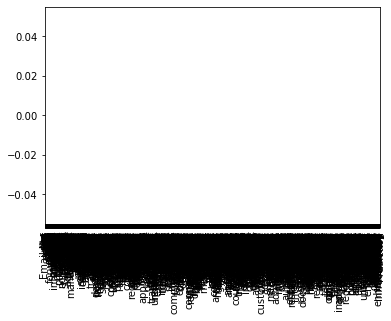

In [7]:
# Handling Null Values
Dataset.isnull().sum().plot.bar()

# Data Preprocessing (EDA Step 2)
1. Transformation
    1. Identify and drop Stop words
    2. Downsample the majority class' samples to balance dataset
2. Normalization or Standardization of Data
3. Encodings (If needed)

In [8]:
# Identify and drop stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
is_a_stopword = Dataset.columns.isin(stopwords.words('english'))
Dataset.columns[is_a_stopword]

Index(['the', 'to', 'and', 'for', 'of', 'a', 'you', 'in', 'on', 'is',
       ...
       'nor', 'myself', 'isn', 'haven', 'whom', 'couldn', 'wasn', 'itself',
       'ma', 'aren'],
      dtype='object', length=134)

In [10]:
# Droping stopwords
New_Data = Dataset.loc[:, ~is_a_stopword].copy()
New_Data.shape

(5172, 2868)

In [11]:
Ham = New_Data.loc[New_Data['Prediction'] == 0]
Spam = New_Data.loc[New_Data['Prediction'] == 1]

In [12]:
Spam.shape, Ham.shape

((1500, 2868), (3672, 2868))

In [13]:
N_Ham = Ham.drop(Ham.index[0:1200])
N_Ham.shape

(2472, 2868)

In [14]:
Model_Data = Spam.append(N_Ham)

In [15]:
Model_Data.shape

(3972, 2868)

(array([2472.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1500.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

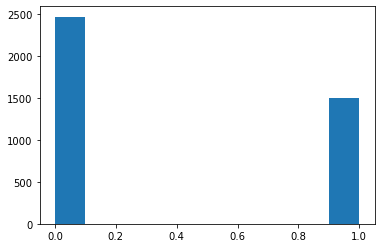

In [16]:
# Number of spam and ham emails
plt.hist(Model_Data.Prediction)

In [17]:
# Droping Email colunm
Model_Data.drop("Email No.", axis='columns')

,ect,hou,enron,com,gas,deal,meter,hpl,please,e,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5,1,0,0,1,0,0,0,0,0,112,...,0,0,0,0,0,0,0,0,0,1
7,2,0,0,0,0,0,0,0,1,34,...,0,0,0,0,0,0,0,1,0,1
16,2,0,0,0,0,0,0,0,0,20,...,0,0,0,0,0,0,0,1,0,1
17,6,5,0,7,0,0,0,0,1,291,...,0,0,0,0,0,0,0,3,0,1
25,2,2,0,5,0,1,0,0,1,265,...,0,0,0,0,0,0,0,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164,3,2,1,1,5,0,0,0,1,145,...,0,0,0,0,0,0,0,0,0,0
5165,1,0,0,0,0,0,0,0,0,13,...,0,0,0,1,0,0,0,0,0,0
5167,2,0,0,0,0,0,0,0,0,29,...,0,0,0,0,0,0,0,0,0,0
5168,11,3,1,3,5,0,0,0,1,218,...,0,0,0,0,0,0,0,1,0,0


# Preparing Dataset for ML modeling

In [18]:
Labels = Model_Data.Prediction
Samples = Model_Data.drop(["Prediction", "Email No."], axis='columns')
Labels.shape, Samples.shape

((3972,), (3972, 2866))

In [19]:
# Train and validation split
X_Tr, X_Test, Y_Tr, Y_Test= train_test_split(Samples, Labels, test_size=0.25, shuffle=True)
X_Tr.shape, X_Test.shape, Y_Tr.shape, Y_Test.shape

((2979, 2866), (993, 2866), (2979,), (993,))

# Model Training

In [20]:
# Importing models
MNB = MultinomialNB()
GNB = GaussianNB()

In [21]:
# Training both models on training data
GNB.fit(X_Tr, Y_Tr)

GaussianNB()

In [22]:
MNB.fit(X_Tr, Y_Tr)

MultinomialNB()

In [23]:
GNB.score(X_Tr, Y_Tr)

0.9724739845585767

In [24]:
MNB.score(X_Tr, Y_Tr)

0.9429338704263176

# Model Testing

In [25]:
MNBPredict = MNB.predict(X_Test)
GNBPredict = GNB.predict(X_Test)

# Accuracy, Confusion Matrix and Classification Report

In [26]:
# Accuracy for both models
print('MNB Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_Test, MNBPredict)))
print('GNB Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_Test, GNBPredict)))

MNB Model accuracy score: 0.9456
GNB Model accuracy score: 0.9607


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


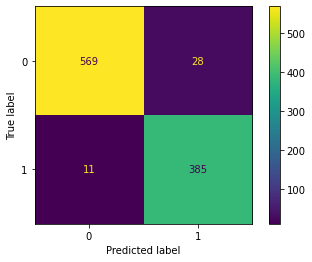

In [27]:
# Confusion Matrix
plot_confusion_matrix(GNB, X_Test, Y_Test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


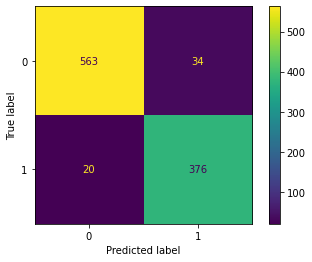

In [28]:
plot_confusion_matrix(MNB, X_Test, Y_Test)

In [29]:
# Classification report
print(classification_report(GNBPredict,Y_Test))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       580
           1       0.97      0.93      0.95       413

    accuracy                           0.96       993
   macro avg       0.96      0.96      0.96       993
weighted avg       0.96      0.96      0.96       993



In [30]:
print(classification_report(MNBPredict,Y_Test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       583
           1       0.95      0.92      0.93       410

    accuracy                           0.95       993
   macro avg       0.95      0.94      0.94       993
weighted avg       0.95      0.95      0.95       993

